# Analisis Exploratorio Pre limpieza - Inmuebles Region Valparaiso

### **Objetivo:** Comprender los datos obtenidos mediante scraping de icasas, su impacto y metodo de limpieza para un mejor rendimiento de modelos de ML

#### Carga de datos y primer vistazo 

In [14]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", None)

In [15]:
# Carga de datos csv
Inmuebles = pd.read_csv(r'C:\Users\sebit\OneDrive\Documentos\Portafolio\Analisis Casas Valparaiso\Scraping icasas\Casas.csv')

In [16]:
Inmuebles.head()

,Precio UF,N Habitaciones,Area m2,N Baños,Comuna,Provincia,Amueblado,Gastos Comunes,Área útil,Estacionamiento,...,Seguridad 24 horas,Vista panorámica,Balcón,Pieza de Servicio,Acceso a discapacitados,Cancha de Tenis,Nivel,Sólo familias,Sauna,Ascensor
0,12.800,3.0,139,4.0,Concón,Valparaíso,Sin amueblar,: true,139,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23.000,4.0,450,5.0,Viña del Mar,Valparaíso,Sin amueblar,NaN,450,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"8.081,8",4.0,160,3.0,Viña del Mar,Valparaíso,Sin amueblar,NaN,160,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.100,3.0,160,3.0,San Felipe,San Felipe de Aconcagua,Semi-amueblado,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"9.567,24",4.0,194,2.0,Quilpué,Valparaíso,Sin amueblar,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Primera visualización 

* Se utiliza (.) como separador de miles y (,) como separador de decimales. Corregir
* Año de Construcción tiene valores como 1.98 posiblemente se tomaron valores *10^(-n) 

In [17]:
Inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Precio UF                  995 non-null    object 
 1   N Habitaciones             974 non-null    float64
 2   Area m2                    927 non-null    object 
 3   N Baños                    967 non-null    float64
 4   Comuna                     995 non-null    object 
 5   Provincia                  995 non-null    object 
 6   Amueblado                  522 non-null    object 
 7   Gastos Comunes             147 non-null    object 
 8   Área útil                  181 non-null    object 
 9   Estacionamiento            546 non-null    object 
 10  m2 terreno                 929 non-null    object 
 11  Enlace                     995 non-null    object 
 12  Año de construcción        401 non-null    float64
 13  Agua                       237 non-null    object 

In [18]:
Inmuebles.describe()

,N Habitaciones,N Baños,Año de construcción,Aseos
count,974.000000,967.000000,401.000000,80.000000
mean,4.425051,3.235781,1.993309,1.087500
std,1.975187,1.847790,0.035819,0.325839
min,1.000000,1.000000,1.500000,1.000000
25%,3.000000,2.000000,1.980000,1.000000
50%,4.000000,3.000000,2.000000,1.000000
75%,5.000000,4.000000,2.014000,1.000000
max,22.000000,25.000000,2.100000,3.000000


El precio mas bajo en UF es de 0.45 (Verificar) y mas alto 235000

In [19]:
Inmuebles.loc[Inmuebles['Precio UF']==0.45, :]

,Precio UF,N Habitaciones,Area m2,N Baños,Comuna,Provincia,Amueblado,Gastos Comunes,Área útil,Estacionamiento,...,Seguridad 24 horas,Vista panorámica,Balcón,Pieza de Servicio,Acceso a discapacitados,Cancha de Tenis,Nivel,Sólo familias,Sauna,Ascensor


* Precio publicado 0.45, sin embargo en descripcion posee un valor de UF 17.800 corregir

In [20]:
Inmuebles.columns

Index(['Precio UF', 'N Habitaciones', 'Area m2', 'N Baños', 'Comuna',
       'Provincia', 'Amueblado', 'Gastos Comunes', 'Área útil',
       'Estacionamiento', 'm2 terreno', 'Enlace', 'Año de construcción',
       'Agua', 'Aire Acondicionado', 'Alarma', 'Bodega', 'Chimenea',
       'Placares', 'Cocina Equipada', 'Terraza', 'Portero',
       'Centros comerciales', 'Cerca de Escuelas', 'Cocina Integrada',
       'Electricidad', 'Internet', 'Patio', 'Aseos', 'Piscina', 'Quincho',
       'Cerca de estación de tren', 'Calefacción', 'Jacuzzi', 'Jardín',
       'Estado de conservación', 'Gas Natural', 'Área juegos infantiles',
       'Gimnasio', 'Seguridad 24 horas', 'Vista panorámica', 'Balcón',
       'Pieza de Servicio', 'Acceso a discapacitados', 'Cancha de Tenis',
       'Nivel', 'Sólo familias', 'Sauna', 'Ascensor'],
      dtype='object')

In [21]:
Inmuebles['Estado de conservación'].unique()

array([nan, 'Excelente', 'Bueno'], dtype=object)

In [22]:
# Mucha informacion que nos interesa de forma numerica esta como object
Numerico = ['Precio UF','Area m2','Área útil','m2 terreno','Año de construcción' ]
for col in Numerico:
    Inmuebles[col] = (
        Inmuebles[col]
        .astype(str)
        .str.replace(".", "", regex=False)   # miles
        .str.replace(",", ".", regex=False)  # decimales
        .str.strip()
    )
for col in Numerico:
    Inmuebles[col] = pd.to_numeric(Inmuebles[col], errors="coerce")

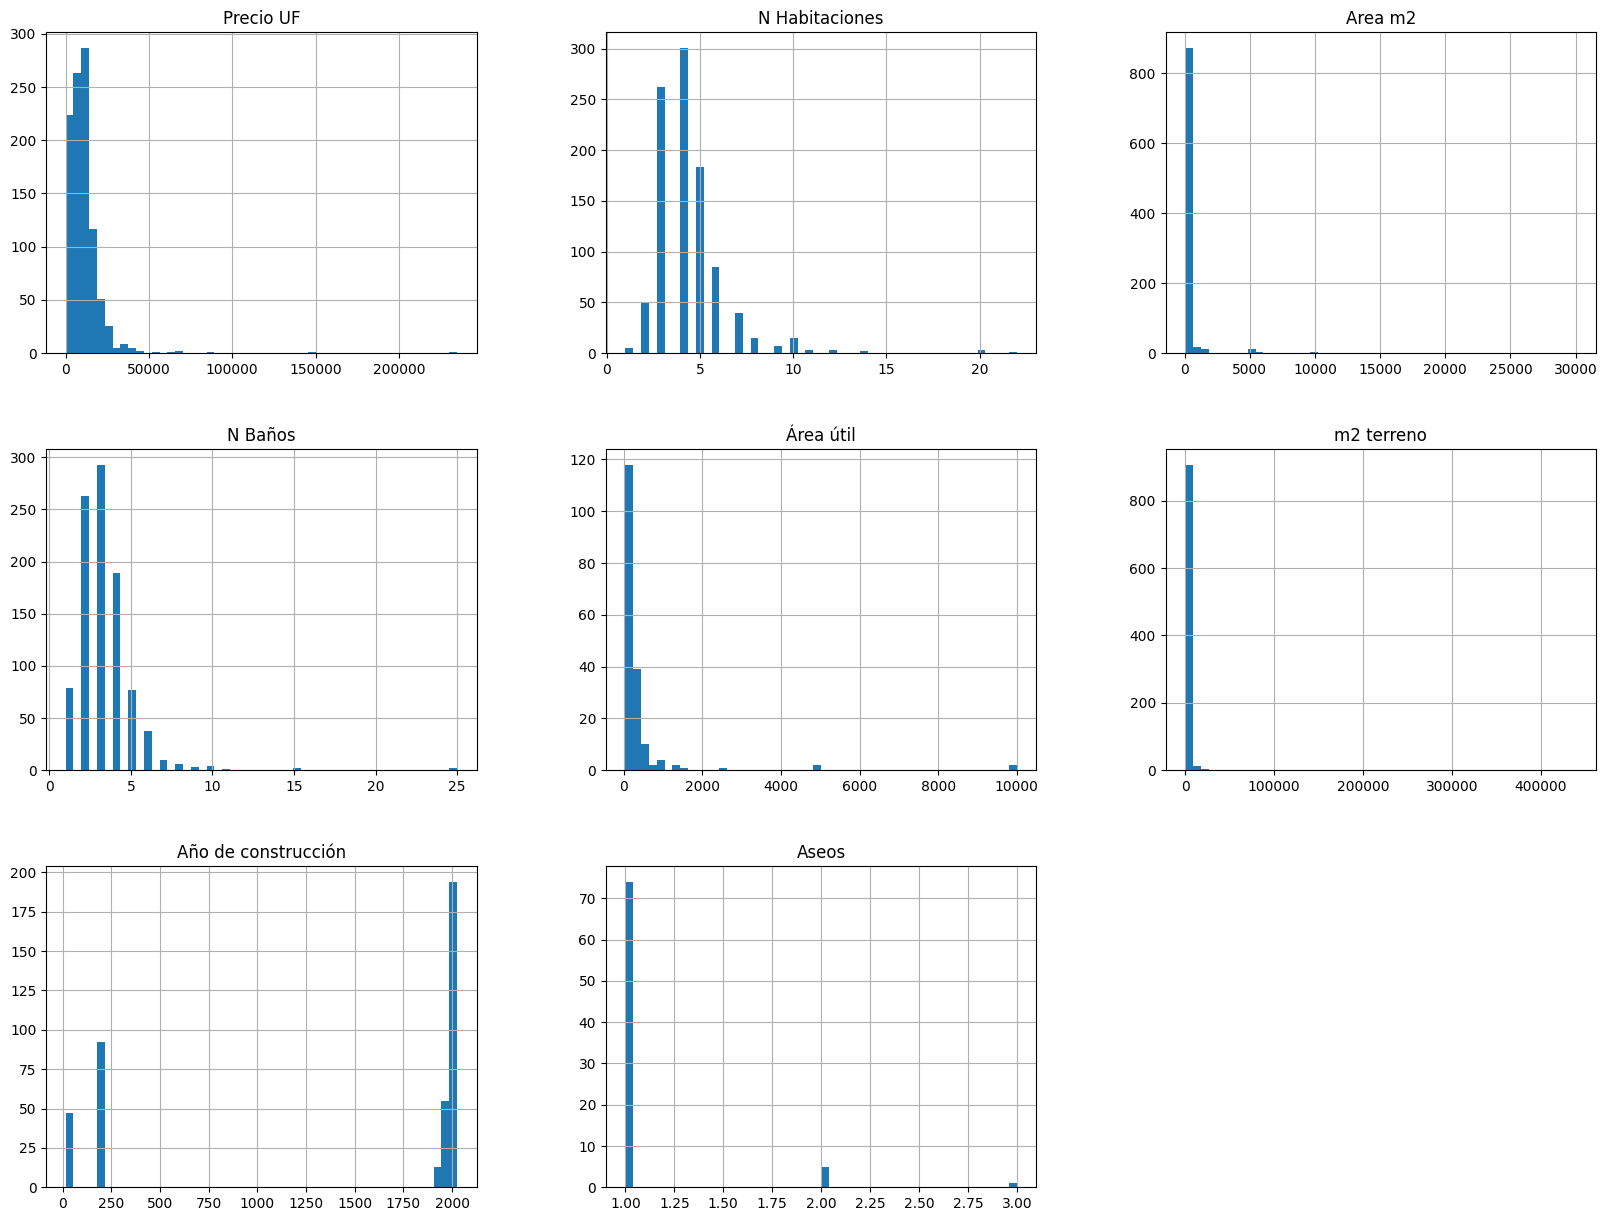

In [23]:
Inmuebles.hist(bins=50, figsize=(20,15))
plt.show()

* Algunos Precios UF son bastante altos verificar.
* Valores sobre 50000 UF son muy escasos (Posible sesgo en ML).
* Numeros de habitaciones llegan incluso a 20 o superior.
* Existe terreno con Area de 10000 m2 
* N Baños llega a tener 15 baños e incluso 25
* Año de construcción tiene datos errones (Inferiores al año 250).


### Visualizacion segmentando Precio UF

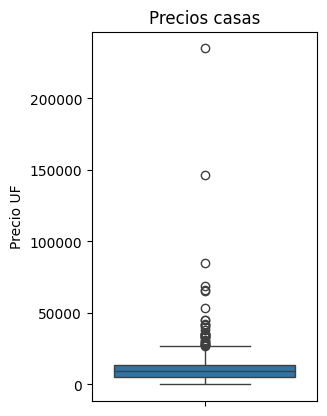

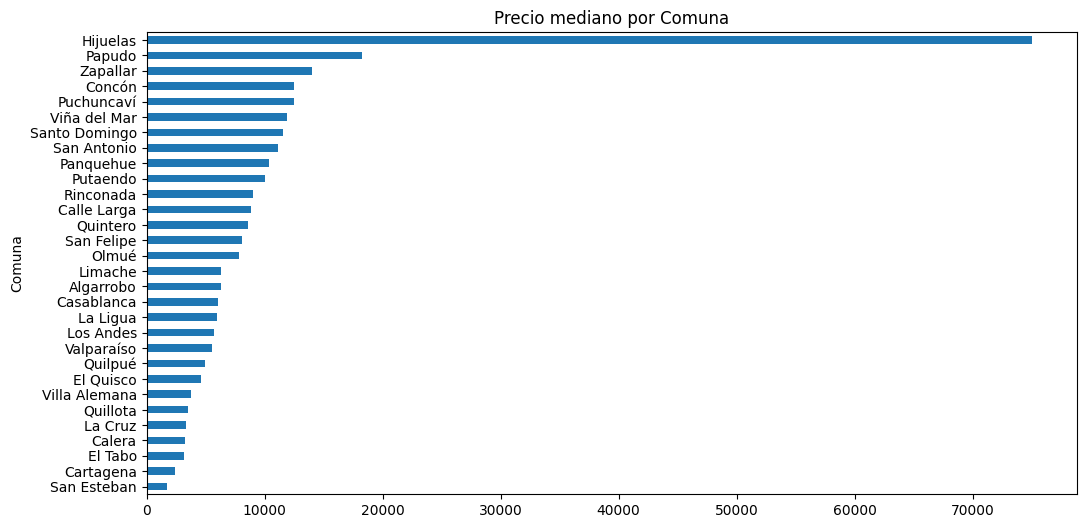

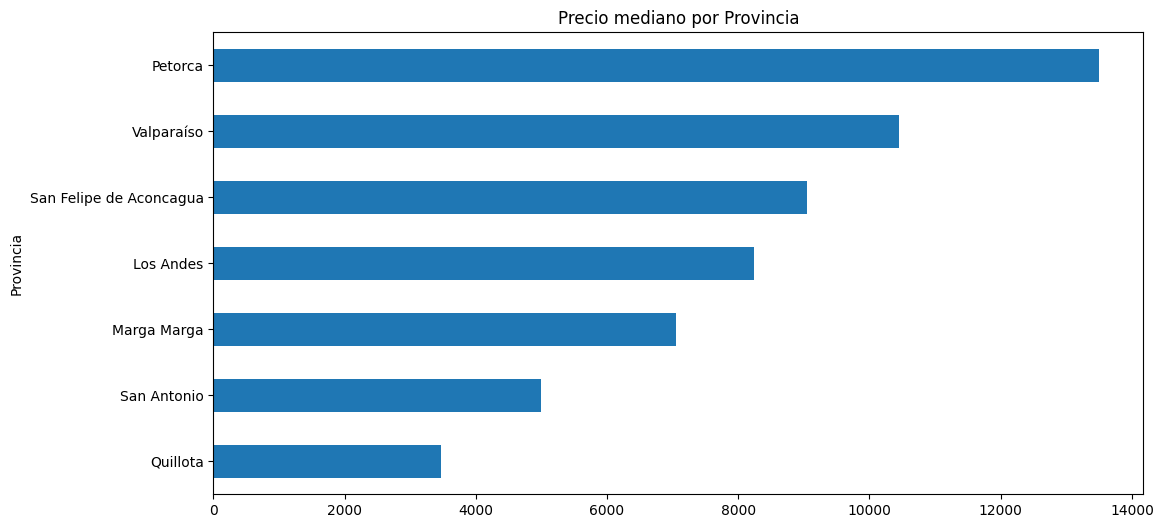

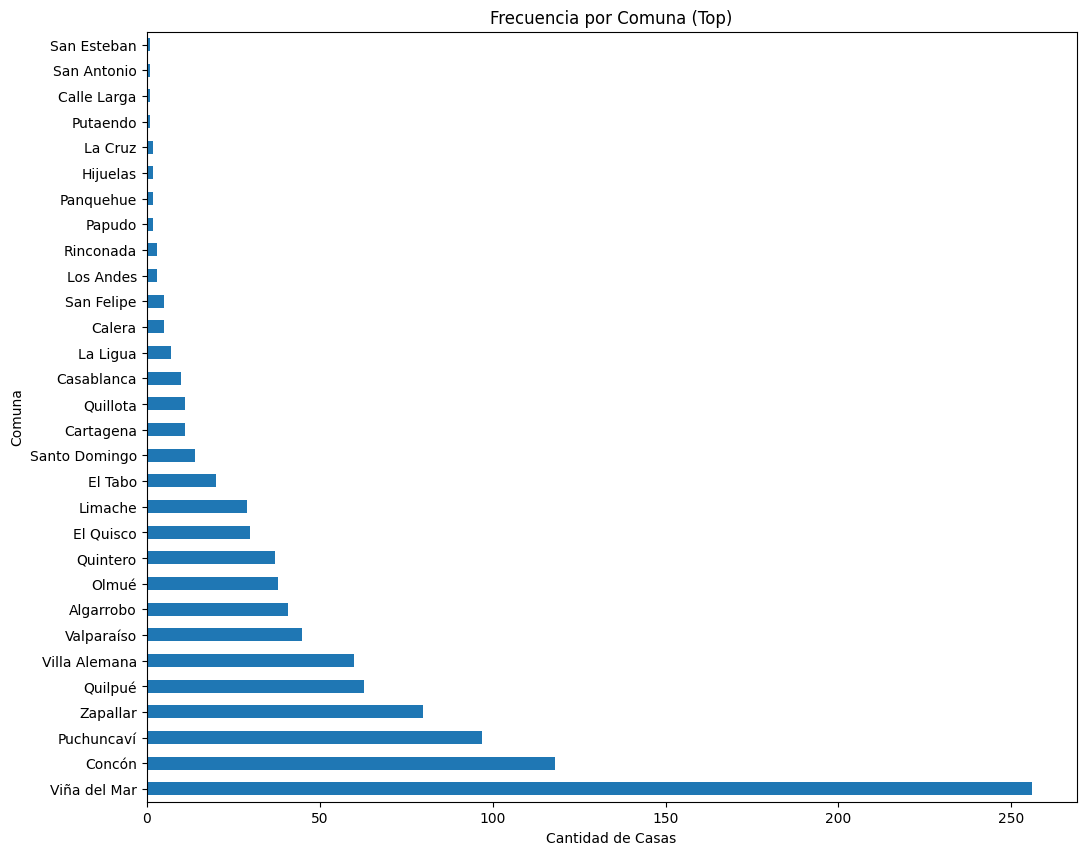

In [24]:
# Distribucion de Precios
plt.subplot(1, 2, 1)
sns.boxplot(data=Inmuebles, y='Precio UF')
plt.title('Precios casas')
plt.show()

# Precio por Comuna
plt.figure(figsize=(12,6))
Inmuebles.groupby('Comuna')['Precio UF'].median().sort_values().plot(kind='barh')
plt.title('Precio mediano por Comuna')
plt.show()

# Precio por Provincia 
plt.figure(figsize=(12,6))
Inmuebles.groupby('Provincia')['Precio UF'].median().sort_values().plot(kind='barh')
plt.title('Precio mediano por Provincia')
plt.show()

# Frecuencias por comuna
plt.figure(figsize=(12, 10))
Inmuebles['Comuna'].value_counts().plot(kind='barh')
plt.title('Frecuencia por Comuna (Top)')
plt.xlabel('Cantidad de Casas')
plt.show()

* Las casas generalmente se encuentran alrededor de 1/4 de 50000 UF, mientras que hay que casas que superan por mucho estos valores (Provocando que la media sea una mala estimación).
* La comuna Hijuela posee una mediana muy por encima de las demás comunas.
* La frecuencia de datos de algunas comunas es muy pequeña, tal que estadisticamente no resultan representativas.

In [25]:
Inmuebles.loc[Inmuebles['Comuna']=='Hijuelas', :]

,Precio UF,N Habitaciones,Area m2,N Baños,Comuna,Provincia,Amueblado,Gastos Comunes,Área útil,Estacionamiento,...,Seguridad 24 horas,Vista panorámica,Balcón,Pieza de Servicio,Acceso a discapacitados,Cancha de Tenis,Nivel,Sólo familias,Sauna,Ascensor
752,3600.3,4.0,137.0,2.0,Hijuelas,Quillota,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,146521.0,NaN,NaN,NaN,Hijuelas,Quillota,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* El precio tan alto correspone debido a que se encuentran solamente 2 bienes, con uno siendo un terreno de lujo (En lugar de solo filtrar por casas se tienen tambien terrenos) 
* Para separar Terrenos y casas se considera que un terreno no tendra N Habitaciones ni N Baños.
* Finalmente crearan columnas Flag para Terrenos y Casas.

### Manejo Año de Construcción no coherente

In [26]:
Inmuebles.loc[Inmuebles['Año de construcción']<1000]

,Precio UF,N Habitaciones,Area m2,N Baños,Comuna,Provincia,Amueblado,Gastos Comunes,Área útil,Estacionamiento,...,Seguridad 24 horas,Vista panorámica,Balcón,Pieza de Servicio,Acceso a discapacitados,Cancha de Tenis,Nivel,Sólo familias,Sauna,Ascensor
8,2341.46,3.0,70.0,2.0,Quilpué,Valparaíso,NaN,NaN,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,11807.99,4.0,450.0,6.0,Quilpué,Valparaíso,Amueblado,NaN,450.0,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
36,7049.55,3.0,136.0,1.0,Viña del Mar,Valparaíso,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,6100.00,4.0,122.0,3.0,Algarrobo,San Antonio,Sin amueblar,NaN,NaN,True,...,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN
41,5561.00,4.0,200.0,1.0,Valparaíso,Valparaíso,Sin amueblar,: true,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,9819.01,NaN,NaN,NaN,Quillota,Quillota,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,9819.01,NaN,NaN,NaN,Quillota,Quillota,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,10826.09,5.0,197.0,2.0,Viña del Mar,Valparaíso,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
976,13995.00,3.0,186.0,3.0,Quintero,Valparaíso,Sin amueblar,: true,NaN,True,...,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


* Se observo la columna de Año de Construcción tiene valores muy pequeños.
* Verificar con algunas paginas y confirmar que los valores estan siendo truncados
* **Solucion**: Los valores al ser truncados solo por 10**n agregar los 0 faltantes, cuando estos sean menores a 1000.

### Filtrar datos que no tendrian sentido con dicha logica.

* Datos que se encuentren entre 0 y 10 sin incluir el valores entre 1.8 y 2.026 (Se obtendria año 2000).
* Datos que se encuentren entre 10 y 18 (Lo cual se obtendria año 1000 y 1800).
* Datos que se encuentren entre 100 y 180.


In [27]:
Condicion1 = (Inmuebles['Año de construcción']>= 0) & (Inmuebles['Año de construcción']<= 10)
print(Inmuebles.loc[Condicion1,['Año de construcción', 'Enlace']])

Condicion2 = (Inmuebles['Año de construcción']>= 10) & (Inmuebles['Año de construcción']<= 18)
print(Inmuebles.loc[Condicion2,['Año de construcción', 'Enlace']])

Condicion3 = (Inmuebles['Año de construcción']>= 100) & (Inmuebles['Año de construcción']<= 180)
print(Inmuebles.loc[Condicion3,['Año de construcción', 'Enlace']])

Condicion4 = (Inmuebles['Año de construcción']>= 1000) & (Inmuebles['Año de construcción']<= 1800)
print(Inmuebles.loc[Condicion4,['Año de construcción', 'Enlace']])

Condicion5 = (Inmuebles['Año de construcción']> 2026)
print(Inmuebles.loc[Condicion5,['Año de construcción', 'Enlace']])

Empty DataFrame
Columns: [Año de construcción, Enlace]
Index: []
    Año de construcción  \
64                 15.0   

                                                                 Enlace  
64  https://www.icasas.cl/propiedad/77aa-80fc-198df32-c59439fb0277-725f  
Empty DataFrame
Columns: [Año de construcción, Enlace]
Index: []
Empty DataFrame
Columns: [Año de construcción, Enlace]
Index: []
Empty DataFrame
Columns: [Año de construcción, Enlace]
Index: []


* Verificando manualmente el enlace correspone a una casa con valor 3776.79 UF que el vendedor publico como construida el año 1500 (Muy improbable, probablemente error humano).
* Comparar datos con los años de construccion por comuna para evaluar procedimiento.

In [28]:
# Correccion de Año de construcción para valores entre 10 y 20.3
Condicion_10_20 = (Inmuebles['Año de construcción']>= 10) & (Inmuebles['Año de construcción'] <= 20.3)
Inmuebles.loc[Condicion_10_20, 'Año de construcción'] *= 100

# Correción de año de Año de construcción para valores entre 100 y 102.6 
Condicion_100_1026 = (Inmuebles['Año de construcción']>= 100) & (Inmuebles['Año de construcción'] <= 202.6)
Inmuebles.loc[Condicion_100_1026, 'Año de construcción'] *= 10

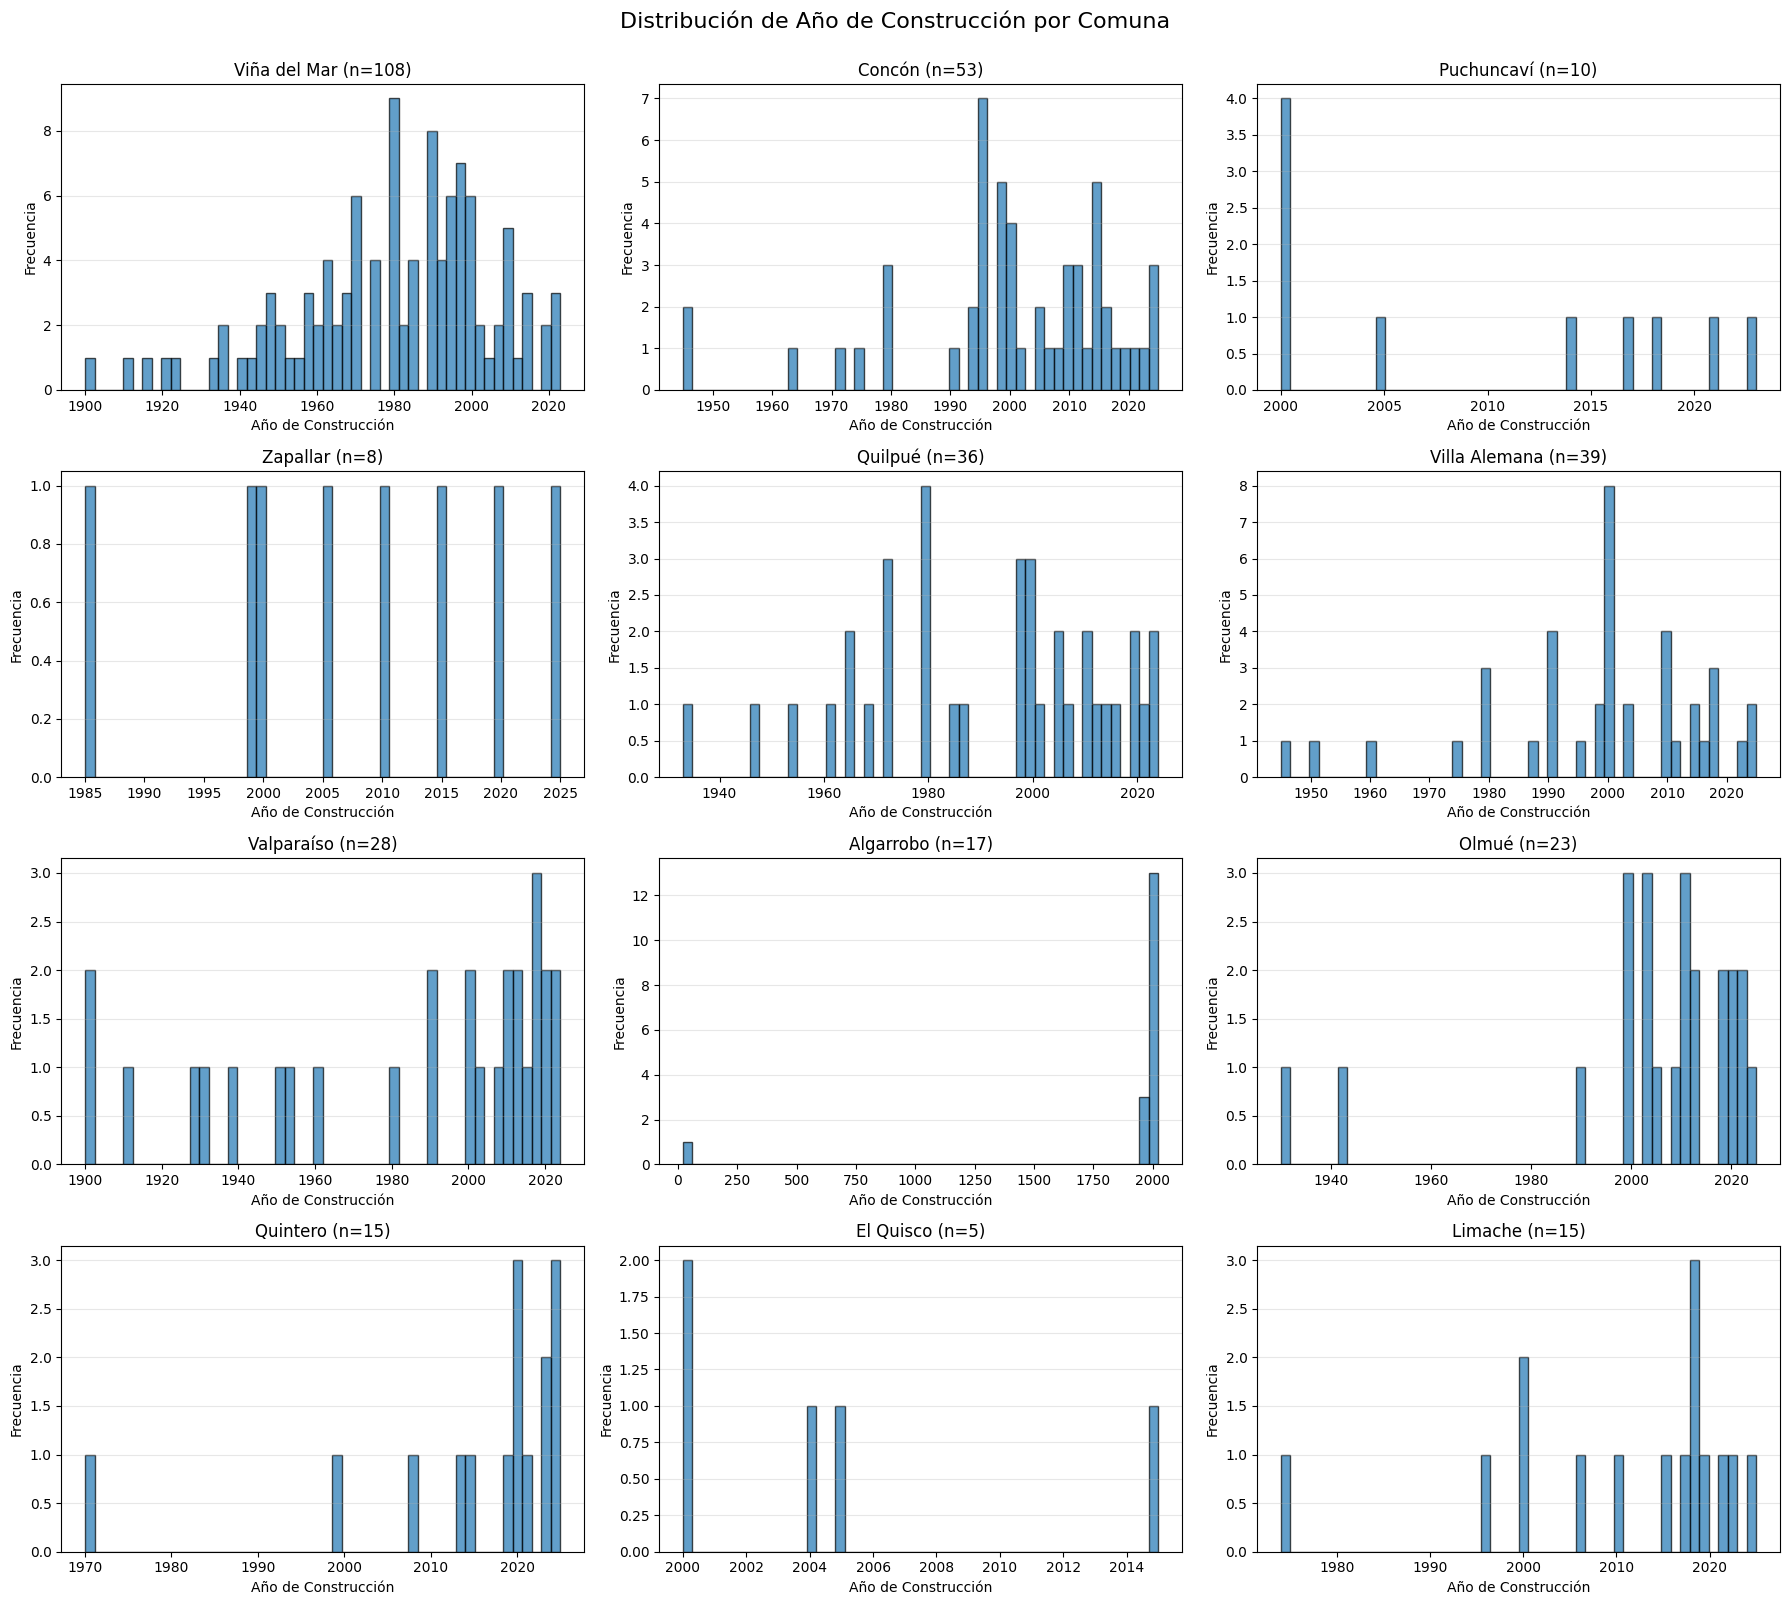

In [29]:
# Seleccionar top comunas (las que tienen más propiedades)
top_n = 12  # Ajustar según necesidad
top_comunas = Inmuebles['Comuna'].value_counts().head(top_n).index

# Filtrar solo esas comunas
df_top = Inmuebles[Inmuebles['Comuna'].isin(top_comunas)]

# Crear subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 16))  # 4 filas x 3 columnas
axes = axes.flatten()

for i, comuna in enumerate(top_comunas):
    # Datos de año de construcción para esta comuna
    datos_comuna = df_top[df_top['Comuna'] == comuna]['Año de construcción'].dropna()
    
    # Histograma
    axes[i].hist(datos_comuna, bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{comuna} (n={len(datos_comuna)})')
    axes[i].set_xlabel('Año de Construcción')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Distribución de Año de Construcción por Comuna', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

* En general no se obtiene algo similar a una distribucion normal para considerar media, utilizar mediana podria ser una buena imputacion, sin embargo se estarian añadiendo muchos años falsos. 
* Por lo tanto, Dejar valores en NaN como la casa de Algarrobo con año 1500 para modelos de Machine Learning. Para modelos que lo requieran como regresion lineal imputar por mediana.

In [30]:
# Conteo y porcentaje de valores faltantes.
Faltante = Inmuebles.isnull().sum()
Faltante_Porcentual= Faltante/len(Inmuebles) *100 

print(pd.DataFrame({'Faltante': Faltante, 'Faltante %': Faltante_Porcentual}))

                           Faltante  Faltante %
Precio UF                         0    0.000000
N Habitaciones                   21    2.110553
Area m2                          68    6.834171
N Baños                          28    2.814070
Comuna                            0    0.000000
Provincia                         0    0.000000
Amueblado                       473   47.537688
Gastos Comunes                  848   85.226131
Área útil                       814   81.809045
Estacionamiento                 449   45.125628
m2 terreno                       66    6.633166
Enlace                            0    0.000000
Año de construcción             594   59.698492
Agua                            758   76.180905
Aire Acondicionado              975   97.989950
Alarma                          891   89.547739
Bodega                          823   82.713568
Chimenea                        839   84.321608
Placares                        868   87.236181
Cocina Equipada                 842   84

* Para Caracteristicas particulares o bien 'Premium' se denotaran como False si no ha sido puesto, ya que su ausencia se considera que no tiene.

### Baños y Habitaciones

* Algunos valores de Baños y Habitaciones poseen valores muy altos verificar

In [31]:
Baños = Inmuebles.sort_values(by='N Baños', ascending=False)
Baños

,Precio UF,N Habitaciones,Area m2,N Baños,Comuna,Provincia,Amueblado,Gastos Comunes,Área útil,Estacionamiento,...,Seguridad 24 horas,Vista panorámica,Balcón,Pieza de Servicio,Acceso a discapacitados,Cancha de Tenis,Nivel,Sólo familias,Sauna,Ascensor
222,17500.00,20.0,1400.0,25.0,Casablanca,Valparaíso,Amueblado,NaN,1400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,17500.00,20.0,1400.0,25.0,Casablanca,Valparaíso,Amueblado,NaN,1400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,25000.00,9.0,380.0,15.0,Valparaíso,Valparaíso,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,41615.00,14.0,600.0,15.0,Quillota,Quillota,Amueblado,NaN,600.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,8560.17,6.0,495.0,11.0,Valparaíso,Valparaíso,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,3700.00,3.0,79.0,NaN,Villa Alemana,Valparaíso,Sin amueblar,: true,79.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,9819.01,NaN,NaN,NaN,Quillota,Quillota,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,9819.01,NaN,NaN,NaN,Quillota,Quillota,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,7770.00,3.0,140.0,NaN,Quintero,Valparaíso,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
Habitaciones = Inmuebles.sort_values(by='N Habitaciones', ascending=False)
Habitaciones

,Precio UF,N Habitaciones,Area m2,N Baños,Comuna,Provincia,Amueblado,Gastos Comunes,Área útil,Estacionamiento,...,Seguridad 24 horas,Vista panorámica,Balcón,Pieza de Servicio,Acceso a discapacitados,Cancha de Tenis,Nivel,Sólo familias,Sauna,Ascensor
876,8811.93,22.0,1000.0,2.0,Calle Larga,Los Andes,Sin amueblar,NaN,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,7800.00,20.0,773.0,NaN,Valparaíso,Valparaíso,Sin amueblar,NaN,773.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,17500.00,20.0,1400.0,25.0,Casablanca,Valparaíso,Amueblado,NaN,1400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,17500.00,20.0,1400.0,25.0,Casablanca,Valparaíso,Amueblado,NaN,1400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,17000.00,14.0,418.0,6.0,Quilpué,Valparaíso,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,6042.47,NaN,1500.0,NaN,Quilpué,Valparaíso,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,41995.00,NaN,NaN,NaN,Valparaíso,Valparaíso,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,146521.00,NaN,NaN,NaN,Hijuelas,Quillota,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,9819.01,NaN,NaN,NaN,Quillota,Quillota,Sin amueblar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Mediante algunas verificaciones manuales se corrobora que la información es correcta.
* Se observaron algunos datos repetidos.

### Datos Duplicados

In [33]:
# Se consideran datos duplicados los que posean mismos enlace.
Duplicados= Inmuebles['Enlace'].duplicated().sum()
print(f'Total Duplicados: {Duplicados}')

Total Duplicados: 0


* Debido a que no existieron coincidencias los datos duplicados se deben a que el vendedor publico varias veces el mismo producto
* Metodo filtrado Precio UF, N Habitaciones, N Baños, Comuna sean iguales

In [34]:
Caracteristicas = ['Precio UF', 'N Habitaciones', 'N Baños', 'Area m2', 'Comuna']
Duplicados_car = Inmuebles.duplicated(subset=Caracteristicas, keep=False).sum()
print(f'Total Duplicados: {Duplicados_car}')

Total Duplicados: 49


* Eliminar duplicados que son exactamente iguales (Mismo anuncio publicado varias veces).

## Normalizar columnas de area en Area Construida y Area Terreno

#### Producto a que se suele publicar el area del terreno sobre area construida cuando estas sean iguales considera:
* Sobre 500 m2 area construida es 0 (Improbable cubrir completamente todo el terreno).
* Bajo 500 m2 se deja de esta forma ya que es posible que cubra casi su totalidad del terreno

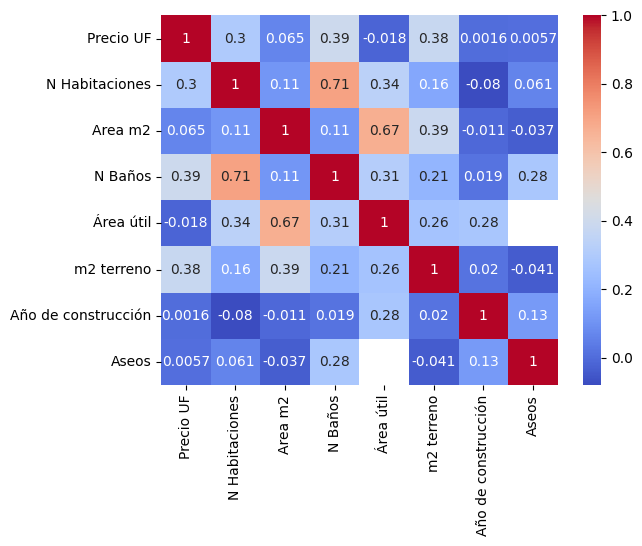

In [35]:
# Correlación con variables numéricas
numeric_cols = Inmuebles.select_dtypes(include=[np.number]).columns
sns.heatmap(Inmuebles[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

### Limpieza

* Valores numericos estan siendo tratados como objetos corregir a float
* Modelos de ML con regresion lineal posiblemente tengan peor rendimiento al no existir variables con depedencias lineales marcadas.
* Año de Construcción dejar en NaN en caso de utilizar regresion lineal (no recomendado), imputar por mediana.
* Precio UF y areas no estan teniendo dependencia lineal (Practicamente nulas a excepcion m2 Terreno), Revisar post limpieza.
* Realizar arreglo a Año de Construcción debido a truncamiento en funcion a 10^n
* Eliminar columnas con servicios basico como Electricidad, Agua, Gas Natural debido a la poca confiabilidad (Suelen no ser puestos u obviados).
* Para Caracteristicas particulares o bien 'Premium' se denotaran como False si no ha sido puesto, ya que su ausencia se considera que no tiene.
* Tener solo 2 columnas de Area Terreno y Area Construida.
* Eliminar inmuebles Duplicados en funcion de las caracteristicas ['Precio UF', 'N Habitaciones', 'N Baños', 'Area m2', 'Comuna']
* Debido a la poca informacion que se posee sobre 50000 UF no considerar estas informacion para el entrenamiento.
* Comunas con poca frecuencia (Se considerara bajo 20), se considerara como otras.

### Feature Engineer

* Crear Flag de Casa Y Terreno cuando corresponda a una (Si una es True la otra sera False) con el fin de poder distinguirlas. Clasificación sera si no tiene Baños ni Habitaciones (Terreno).
* Flag Precio/m2 por comuna y Precio/m2 por casa (Indicador de sobrevalorado o infravalorado).